# House Damage in Nepal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Data description and Problem statement

### Data Prep

In [2]:
# read in data
train_data = pd.read_csv("train_values.csv", index_col="building_id")
train_label = pd.read_csv("train_labels.csv", index_col="building_id")

In [3]:
train_data.head()
#train_label.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [5]:
train_label.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [6]:
df = pd.merge(train_data,train_label, on="building_id", how="inner")

In [7]:
train_data.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### `INSIGHT`

In [8]:
train_data.roof_type.nunique()

3

### EDA on Categorical Columns

#### *Cardinality*

In [9]:
train_data.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

In [10]:
train_data.roof_type.value_counts()

roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64

Text(0, 0.5, 'Percentage')

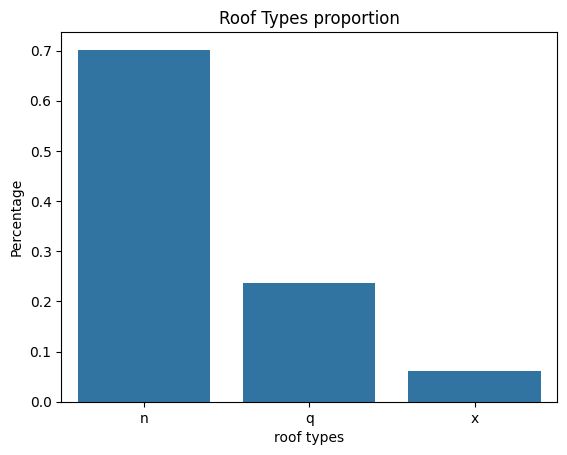

In [11]:
sns.barplot(data=train_data.roof_type.value_counts(normalize=True))
plt.title("Roof Types proportion")
plt.xlabel("roof types")
plt.ylabel("Percentage")

In [12]:
train_data.land_surface_condition.value_counts(normalize=True)

land_surface_condition
t    0.831758
n    0.136331
o    0.031911
Name: proportion, dtype: float64

<Axes: xlabel='land_surface_condition', ylabel='proportion'>

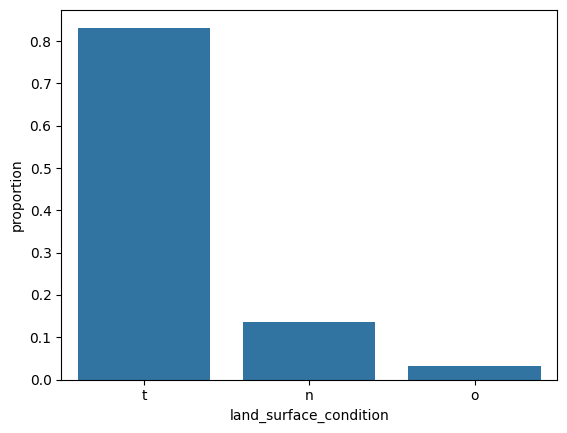

In [13]:
sns.barplot(data=train_data.land_surface_condition.value_counts(normalize=True))

In [14]:
(df.groupby(['damage_grade', 'roof_type'])['roof_type'].count()).to_frame()

roof_type
damage_grade roof_type           
1            n              13547
             q               3926
             x               7651
2            n             106447
             q              34009
             x               7803
3            n              62848
             q              23641
             x                729

In [15]:
# Foundtion type
train_data.foundation_type.value_counts()

foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64

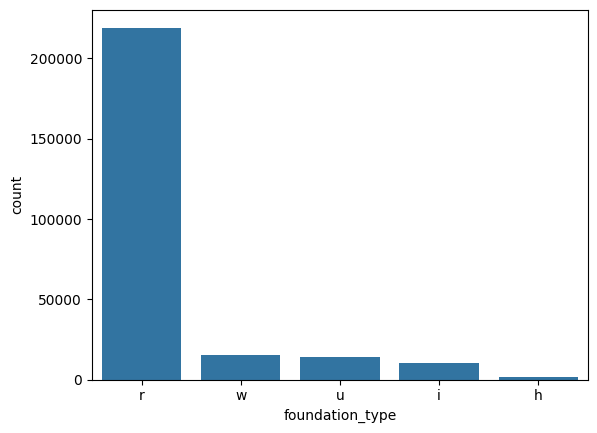

In [16]:
#plot distribution
sns.barplot(data=train_data.foundation_type.value_counts());

In [17]:
# Ground floor types
train_data.ground_floor_type.value_counts()

ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64

<Axes: xlabel='ground_floor_type', ylabel='count'>

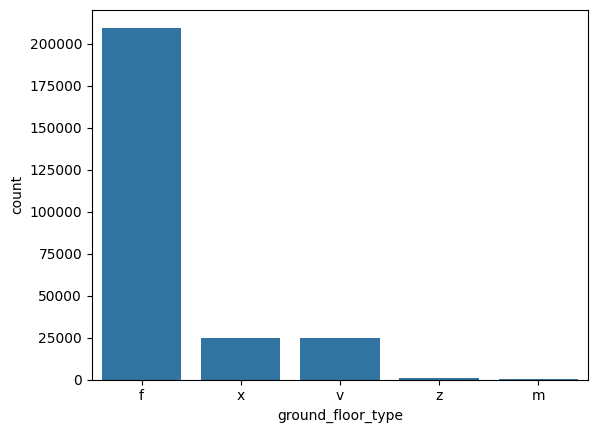

In [18]:
# plot didtriburion
sns.barplot(data=train_data.ground_floor_type.value_counts())

In [19]:
# Other floors type
train_data.other_floor_type.value_counts()

other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64

<Axes: xlabel='other_floor_type', ylabel='count'>

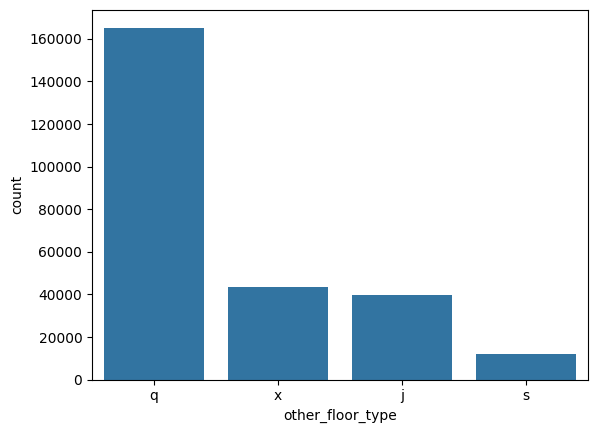

In [20]:
sns.barplot(data=train_data.other_floor_type.value_counts())

In [22]:
train_data.position.value_counts()

position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64

<Axes: xlabel='position', ylabel='count'>

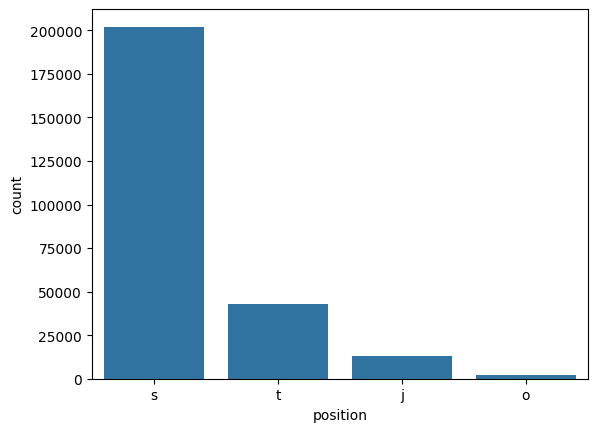

In [23]:
sns.barplot(data=train_data.position.value_counts());

### Ways Categorical variables relates with our target variable `damage_grade`

In [28]:
roof_pivot = pd.pivot_table(
    data=df, index='foundation_type', values='damage_grade', aggfunc=np.mean
).sort_values(by='damage_grade')
roof_pivot

/tmp/ipykernel_5756/138243106.py:1: FutureWarning: The provided callable <function mean at 0x7c3cbcf6de10> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  roof_pivot = pd.pivot_table(


,damage_grade
foundation_type,
i,1.453351
w,1.810954
u,1.883661
h,2.105663
r,2.329573


In [ ]:
### Numerical variable

<Axes: xlabel='damage_grade', ylabel='age'>

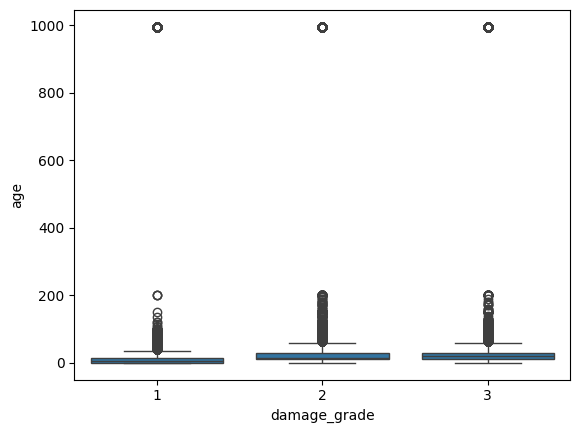

In [29]:
sns.boxplot(x='damage_grade', y='age', data=df)

In [ ]:
# Insight from the above distribution

<Axes: xlabel='damage_grade', ylabel='age'>

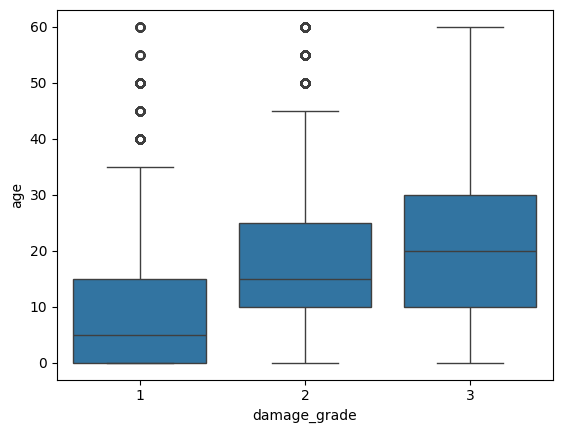

In [51]:
q5, q95 = df['age'].quantile([.05,.95])
mask = df['age'].between(q5,q95)
sns.boxplot(x='damage_grade', y='age', data=df[mask])

<Axes: xlabel='age', ylabel='Count'>

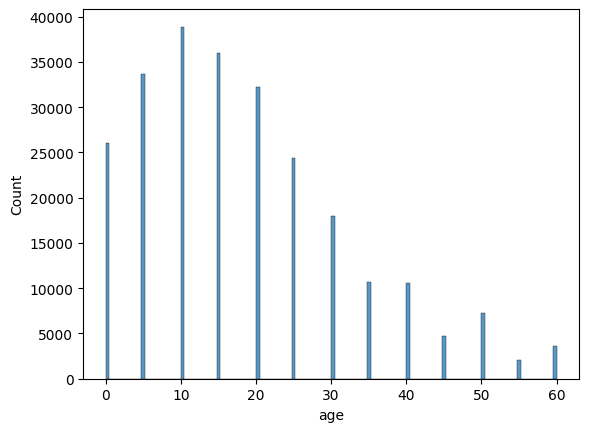

In [53]:
sns.histplot(x='age', data=df[mask])